 K-Nearest Neighbors (KNN)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('/content/drive/MyDrive/pharmacy (1).csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:

categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['Drug', 'BP', 'Cholesterol', 'Sex']

In [6]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns

['Age', 'Na_to_K']

In [27]:
# Convert categorical variables to dummy variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

In [8]:
# Split the data into features and target variable
X = data_encoded.drop('Drug', axis=1)
y = data_encoded['Drug']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_test_scaled)

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  3]
 [ 0  0  0 18  0]
 [ 1  3  0  4 18]]


In [14]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.50      0.67         6
       drugX       0.82      1.00      0.90        18
       drugY       0.86      0.69      0.77        26

    accuracy                           0.82        60
   macro avg       0.81      0.84      0.79        60
weighted avg       0.84      0.82      0.81        60



In [15]:
X_vis = data_encoded[['Age', 'Na_to_K']]
y = data_encoded['Drug']


<ipython-input-16-d71744c8919b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=data, palette='Set2')


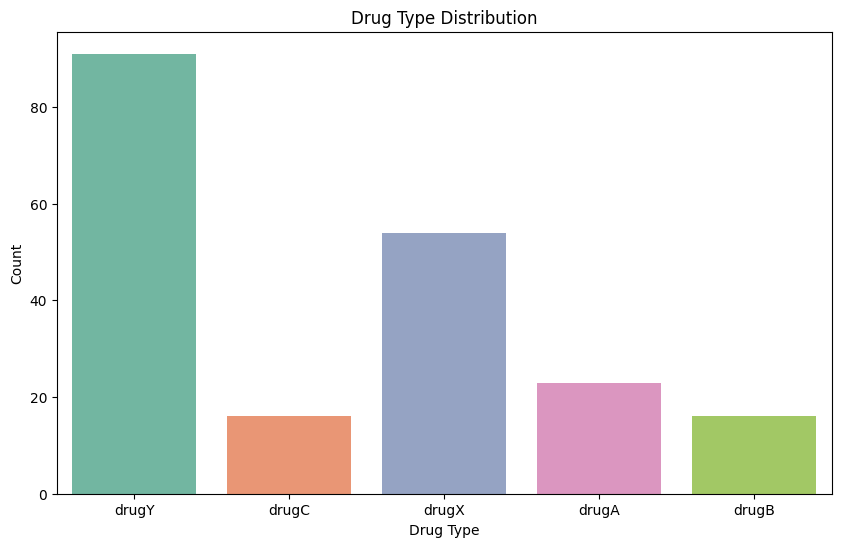

In [16]:

# Plot 1: Drug Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', data=data, palette='Set2')
plt.title('Drug Type Distribution')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.show()


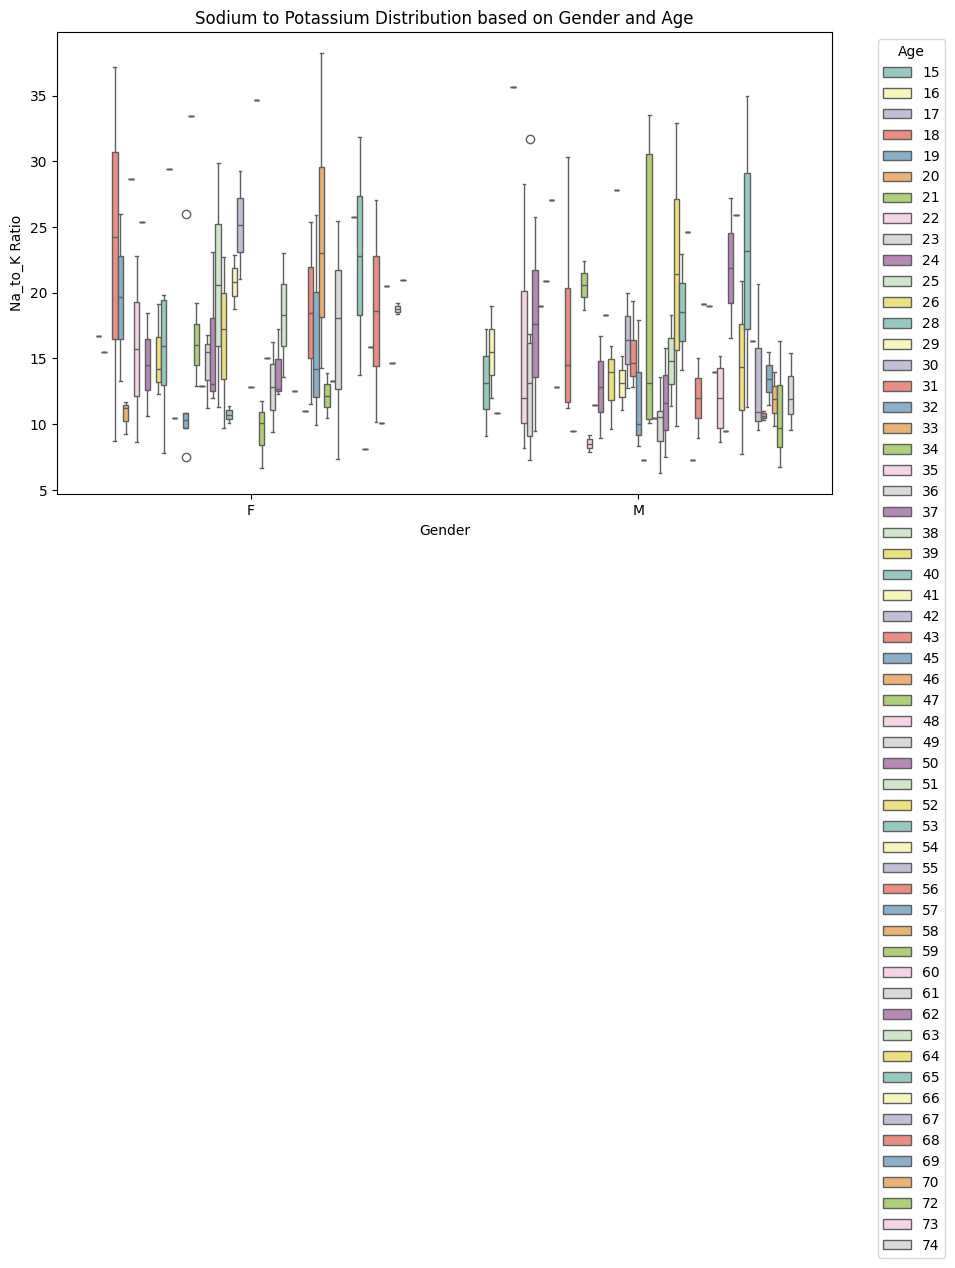

In [17]:
# Plot 6: Sodium to Potassium Distribution based on Gender and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Na_to_K', hue='Age', data=data, palette='Set3')
plt.title('Sodium to Potassium Distribution based on Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Na_to_K Ratio')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
# Split the data into training and testing sets
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)


In [19]:

# Standardize the features
X_vis_train_scaled = scaler.fit_transform(X_vis_train)
X_vis_test_scaled = scaler.transform(X_vis_test)

In [20]:
# Train the KNN model for visualization (using only two features)
knn_model_vis = KNeighborsClassifier(n_neighbors=5)
knn_model_vis.fit(X_vis_train_scaled, y_vis_train)


KNeighborsClassifier()

In [21]:
# Create a mesh grid for plotting decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_vis_train_scaled[:, 0].min() - 1, X_vis_train_scaled[:, 0].max() + 1
y_min, y_max = X_vis_train_scaled[:, 1].min() - 1, X_vis_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [22]:
# Predict the classification for each point in the mesh grid
Z = knn_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])


In [23]:
# Ensure Z is the correct shape for plotting
Z = Z.reshape(xx.shape)

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  3]
 [ 0  0  0 18  0]
 [ 1  3  0  4 18]]


In [25]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.50      0.67         6
       drugX       0.82      1.00      0.90        18
       drugY       0.86      0.69      0.77        26

    accuracy                           0.82        60
   macro avg       0.81      0.84      0.79        60
weighted avg       0.84      0.82      0.81        60



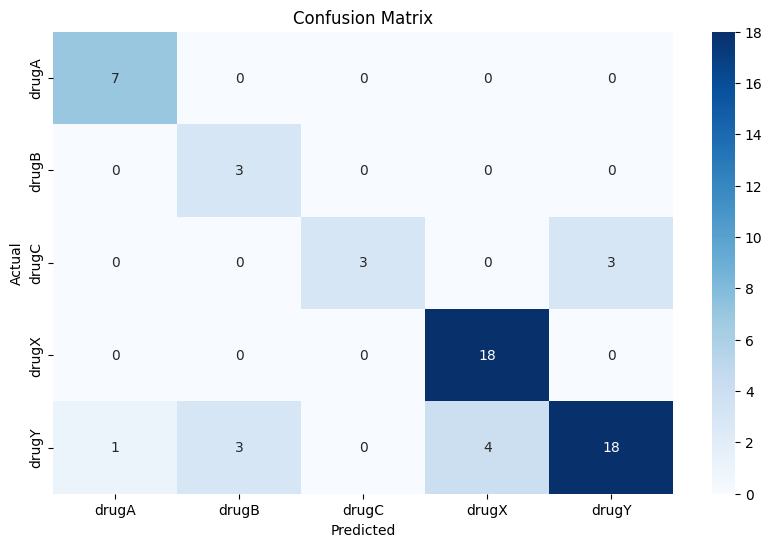

In [26]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()